# Modelos para la predicción de energía electrica

1. Cargo los datos tranformados en el notebook exploración de datos.
2. Exploro las variables a utilizar en los modelos.
3. Modelo base de partida.
4. Decision Tree.
5. Random Forest.
6. Gradient Boosting Trees.
7. Comparación de modelos.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [61]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

### 1 - Datos:

In [4]:
datos = pd.read_csv('datos_finales.csv', parse_dates = ['datetime'], index_col = 'datetime')
datos.index = pd.DatetimeIndex(datos.index).to_period('H')

In [5]:
datos

,datetime_utc,demanda_electrica,tmed,minutos_luz,hora,nombre_mes,dia_semana,festivo,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December,fecha,año,mes,dia
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00,2016-01-01 00:00:00+01:00,487.174,12.4,566,0,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 01:00,2016-01-01 01:00:00+01:00,459.223,12.4,566,1,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 02:00,2016-01-01 02:00:00+01:00,428.181,12.4,566,2,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 03:00,2016-01-01 03:00:00+01:00,400.044,12.4,566,3,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
2016-01-01 04:00,2016-01-01 04:00:00+01:00,379.334,12.4,566,4,January,Friday,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00,2019-12-31 19:00:00+01:00,845.089,10.2,565,19,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31
2019-12-31 20:00,2019-12-31 20:00:00+01:00,801.779,10.2,565,20,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31
2019-12-31 21:00,2019-12-31 21:00:00+01:00,709.272,10.2,565,21,December,Tuesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2019-12-31,2019,12,31


De éste dataframe, me voy a quedar con las variables que finalmente voy a utilizar:
- La variable objetivo, es decir, la variable que voy a tratar de predecir es 'demanda_electrica', que representa la energía eléctrica demandada en Islas Baleares en MW/h con frecuencia horaria.
- La features finalmente serán:
        - tmed: temperatura media diaria y que será común para todas las horas de un mismo día.
        - minutos_luz: minutos para cada día entre la salida y puesta de sol.
        - hora: hora del día.
        - festivo: variable que indica si el día es festivo (1) o no (0).
        - Cada uno de los días de la semana: Toma el valor 1 cuando se corresponde a ese día y 0 en caso contrario.

In [6]:
datos[['demanda_electrica', 'tmed', 'minutos_luz', 'festivo', 'hora',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

,demanda_electrica,tmed,minutos_luz,festivo,hora,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
datetime,,,,,,,,,,,,
2016-01-01 00:00,487.174,12.4,566,1,0,0,0,0,0,1,0,0
2016-01-01 01:00,459.223,12.4,566,1,1,0,0,0,0,1,0,0
2016-01-01 02:00,428.181,12.4,566,1,2,0,0,0,0,1,0,0
2016-01-01 03:00,400.044,12.4,566,1,3,0,0,0,0,1,0,0
2016-01-01 04:00,379.334,12.4,566,1,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00,845.089,10.2,565,0,19,0,1,0,0,0,0,0
2019-12-31 20:00,801.779,10.2,565,0,20,0,1,0,0,0,0,0
2019-12-31 21:00,709.272,10.2,565,0,21,0,1,0,0,0,0,0


### 2 - Exploración de las variables:
Graficos y correlaciones entre variables numéricas

In [7]:
datos_num = datos[['demanda_electrica', 'tmed', 'minutos_luz', 'hora']]
datos_num

,demanda_electrica,tmed,minutos_luz,hora
datetime,,,,
2016-01-01 00:00,487.174,12.4,566,0
2016-01-01 01:00,459.223,12.4,566,1
2016-01-01 02:00,428.181,12.4,566,2
2016-01-01 03:00,400.044,12.4,566,3
2016-01-01 04:00,379.334,12.4,566,4
...,...,...,...,...
2019-12-31 19:00,845.089,10.2,565,19
2019-12-31 20:00,801.779,10.2,565,20
2019-12-31 21:00,709.272,10.2,565,21


In [8]:
datos_num.corr()

,demanda_electrica,tmed,minutos_luz,hora
demanda_electrica,1.000000,0.559286,0.427849,0.527520
tmed,0.559286,1.000000,0.708039,-0.000064
minutos_luz,0.427849,0.708039,1.000000,0.000151
hora,0.527520,-0.000064,0.000151,1.000000


In [9]:
import seaborn as sns

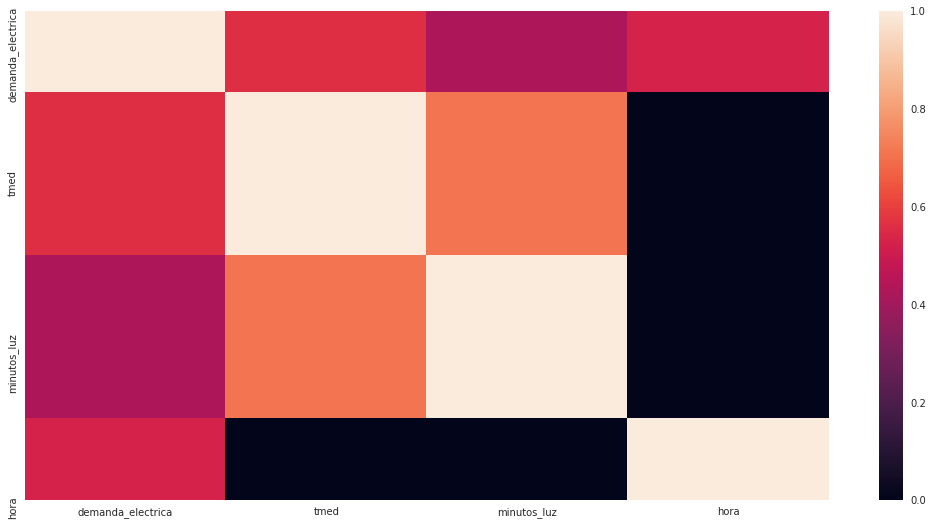

In [64]:
sns.heatmap(datos_num.corr())

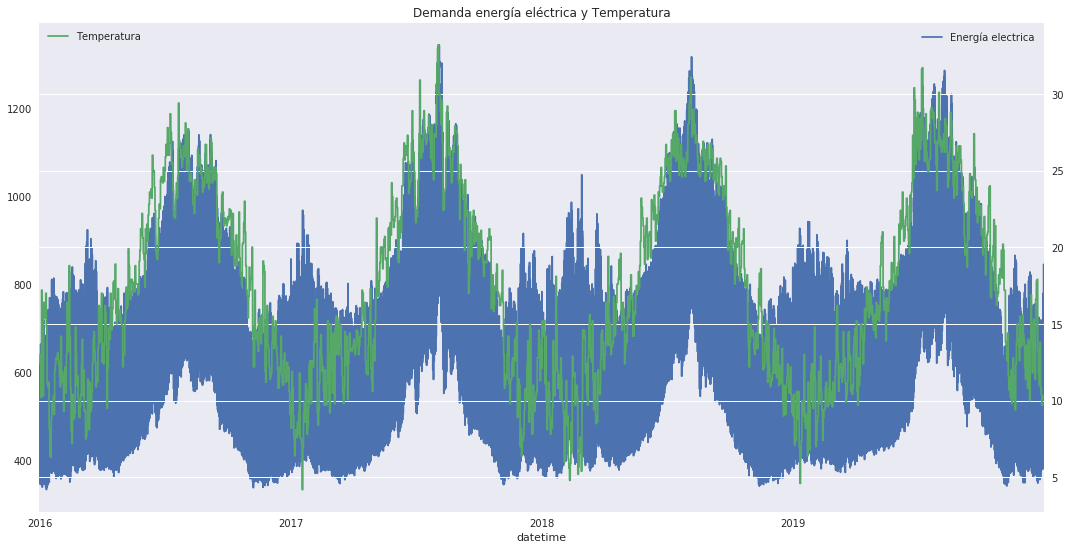

In [93]:
datos['demanda_electrica'].plot()
plt.legend(['Energía electrica'], loc = 2)
datos['tmed'].plot(secondary_y = True)
plt.legend(['Temperatura'], loc = 2)
plt.title('Demanda energía eléctrica y Temperatura');

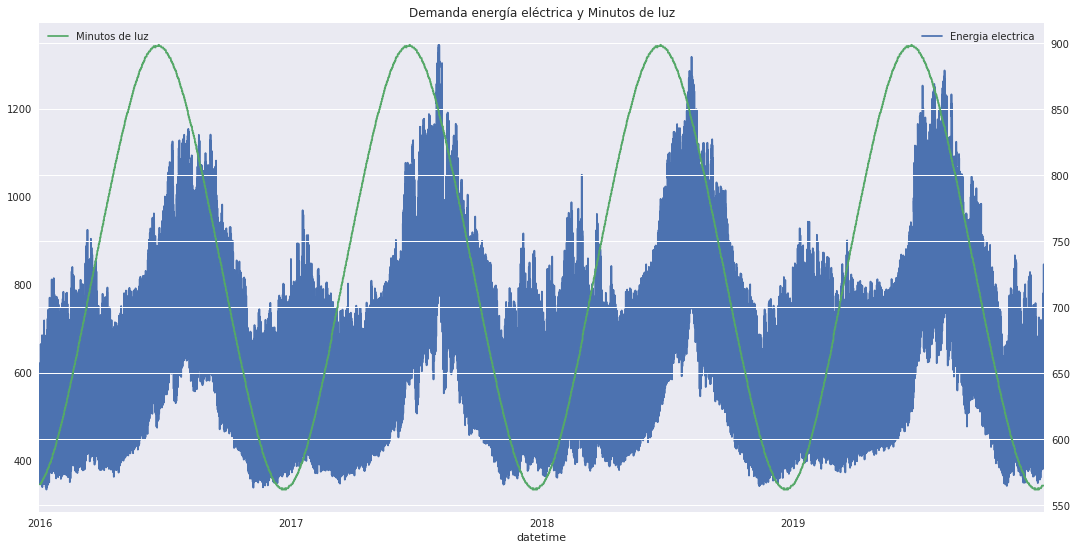

In [96]:
datos['demanda_electrica'].plot()
plt.legend(['Energia electrica'], loc = 2)
datos['minutos_luz'].plot(secondary_y = True)
plt.legend(['Minutos de luz'], loc = 2)
plt.title('Demanda energía eléctrica y Minutos de luz');

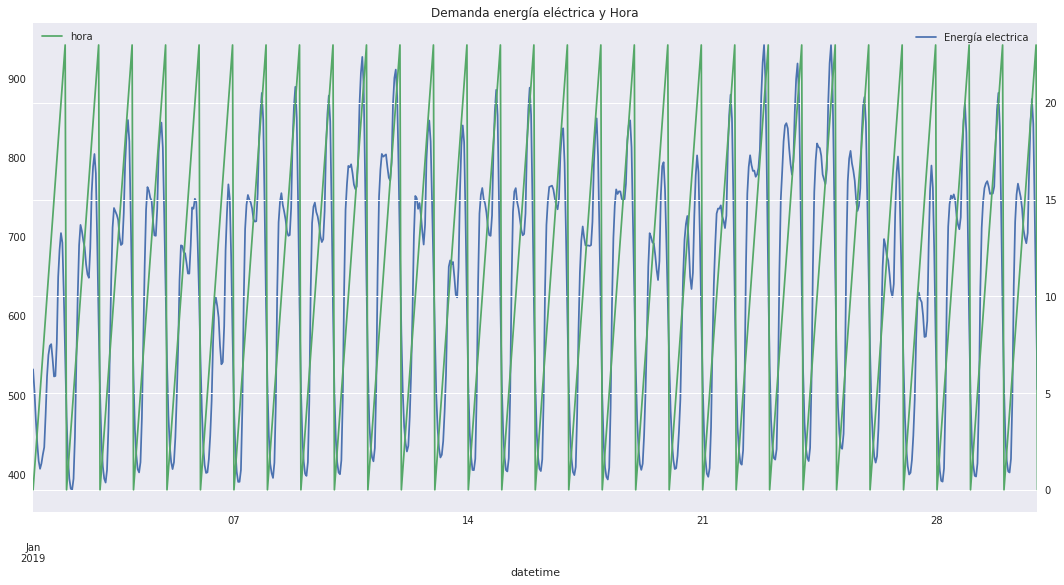

In [107]:
datos['demanda_electrica'].truncate('2019-01-01', '2019-01-31').plot()
plt.legend(['Energía electrica'], loc = 2)
datos['hora'].truncate('2019-01-01', '2019-01-31').plot(secondary_y = True)
plt.legend(['hora'], loc = 2)
plt.title('Demanda energía eléctrica y Hora');